Steps to follow-
1.	Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)
2.	Take a subset of the dataset to make it less sparse/ denser. ( For example, keep the users only who has given 50 or more number of ratings )
3.	Split the data randomly into train and test dataset. ( For example, split it in 70/30 ratio)
4.	Build Popularity Recommender model.
5.	Build Collaborative Filtering model.
6.	Evaluate both the models. ( Once the model is trained on the training data, it can be used to compute the error (like RMSE) on predictions made on the test data.) You can also use a different method to evaluate the models.
7.	Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products.
8.	Summarise your insights.


### 1.	Read and explore the given dataset.  ( Rename column/add headers, plot histograms, find data characteristics)

In [1]:
import numpy as np  
import pandas as pd

In [2]:
Recom_data = pd.read_csv("ratings_Electronics.csv")  
Recom_data.head()

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [3]:
Recom_data.columns=['UserId', 'ProductId', 'Ratings','timestamp']
Recom_data.head()

,UserId,ProductId,Ratings,timestamp
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600


In [4]:
Recom_data=Recom_data.drop(columns='timestamp')

In [5]:
print(Recom_data.shape)

(7824481, 3)


In [6]:
Recom_data.isnull().sum()

UserId       0
ProductId    0
Ratings      0
dtype: int64

In [7]:
Recom_data['Ratings'].value_counts()

5.0    4347540
4.0    1485781
1.0     901765
3.0     633073
2.0     456322
Name: Ratings, dtype: int64

In [8]:
Recom_data.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C14A7EDA0>]],
      dtype=object)

#### Data Characteristics 

In [9]:
Recom_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Ratings,7824481.0,4.012337,1.38091,1.0,3.0,5.0,5.0,5.0


In [10]:
ratings_mean_count = pd.DataFrame(Recom_data.groupby('ProductId')['Ratings'].mean()) 

In [11]:
ratings_mean_count.head()

,Ratings
ProductId,
0321732944,5.000000
0439886341,1.666667
0511189877,4.500000
0528881469,2.851852
0558835155,3.000000


In [12]:
ratings_mean_count['rating_counts'] = pd.DataFrame(Recom_data.groupby('ProductId')['Ratings'].count())  

In [13]:
ratings_mean_count.head()  

,Ratings,rating_counts
ProductId,,
0321732944,5.000000,1
0439886341,1.666667,3
0511189877,4.500000,6
0528881469,2.851852,27
0558835155,3.000000,1


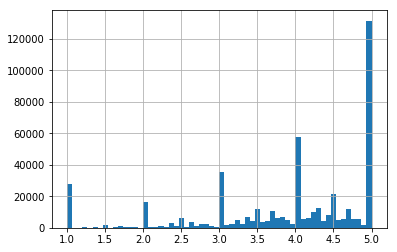

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
ratings_mean_count['Ratings'].hist(bins=60)

In [15]:
ratings_mean_count.sort_values(by='rating_counts', ascending=False)

,Ratings,rating_counts
ProductId,,
B0074BW614,4.491504,18244
B00DR0PDNE,3.931020,16454
B007WTAJTO,4.424005,14172
B0019EHU8G,4.754497,12285
B006GWO5WK,4.314657,12226
B003ELYQGG,4.392528,11617
B003ES5ZUU,4.704749,10276
B007R5YDYA,4.690926,9907
B00622AG6S,4.420136,9823


In [16]:
Count=Recom_data.groupby('UserId')['Ratings'].count()

In [17]:
most_50=Recom_data[Recom_data['UserId'].isin(Count[Count > 50].index)]
most_50['UserId'].value_counts()

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
ARBKYIVNYWK3C     296
A25C2M3QF9G7OQ    296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A2UOHALGF2X77Q    227
                 ... 
A1UMSB7LAW0RIR     51
A303SNZ4AR7TDQ     51
A32AK8FOAZEPE2     51
A1CN1P7147QDJC     51
ASHJAZC9OA9NS      51
A2HJY7418G1KV1     51
A1AZQCVCDBQP6      51
A2XRIU3SOYZ0ZC     51
AN2IZT80ZUNJN      51
A1VLE2SH9J8WYS     51
A3AGQAXTX6VRJ3     51
A313H6238N589      51
A18NDN2CIG2TKR     51
A2NPN06SYI5VL3     51
A87CILADRI

In [18]:
most_50.head()

,UserId,ProductId,Ratings
117,AT09WGFUM934H,0594481813,3.0
176,A32HSNCNPRUMTR,0970407998,1.0
177,A17HMM1M7T9PJ1,0970407998,4.0
491,A3CLWR1UUZT6TG,0972683275,5.0
630,A3TAS1AG6FMBQW,0972683275,5.0


In [19]:
print('Total user with different Ratings :',Recom_data.shape)
print('User who haven ratings to 50 or more product :',most_50.shape)

Total user with different Ratings : (7824481, 3)
User who haven ratings to 50 or more product : (122171, 3)


### 3.	Split the data randomly into train and test dataset. 

In [20]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(most_50, test_size = 0.20, random_state=0)

In [21]:
# Importing Surprise library pakages 
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split


In [22]:
reader = Reader(line_format='user item rating ', sep=',',rating_scale=(1, 5))

In [23]:
data = Dataset.load_from_df(most_50[['UserId', 'ProductId', 'Ratings']], reader)

In [24]:
data

In [25]:
# Spliting the data into train and test 
trainset, testset = train_test_split(data, test_size=.3)

In [26]:
#Importing SVD from Surprise
from surprise import SVD
#importing gridsearchcv fro parameter tunning 
from surprise.model_selection import GridSearchCV


In [27]:
# defining Parameter Grid 
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

#Instantiating gridsearchcv object
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
# fitting data into the object  
gs.fit(data)


In [28]:
# best RMSE score
print(gs.best_score['rmse'])

# combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.9861684501912085
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [29]:
# We can now use the algorithm that yields the best rmse:
algo = gs.best_estimator['rmse']
trainingSet = data.build_full_trainset()
trainingSet = algo.fit(trainingSet)

In [30]:
# stroring the results of gridSearch Cv in results_df
results_df = pd.DataFrame.from_dict(gs.cv_results)

In [31]:
results_df.head()

,split0_test_rmse,split1_test_rmse,split2_test_rmse,mean_test_rmse,std_test_rmse,rank_test_rmse,split0_test_mae,split1_test_mae,split2_test_mae,mean_test_mae,std_test_mae,rank_test_mae,mean_fit_time,std_fit_time,mean_test_time,std_test_time,params,param_n_epochs,param_lr_all,param_reg_all
0,1.011328,1.017141,1.014009,1.014159,0.002376,7,0.778279,0.780952,0.778150,0.779127,0.001291,7,2.837105,0.007001,0.606502,0.058918,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.4}",5,0.002,0.4
1,1.012173,1.018639,1.014667,1.015160,0.002663,8,0.779711,0.783330,0.779538,0.780860,0.001748,8,2.781869,0.006754,0.635115,0.059670,"{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.6}",5,0.002,0.6
2,0.993101,0.998113,0.994810,0.995341,0.002080,3,0.756243,0.758552,0.755036,0.756610,0.001459,3,2.748168,0.042995,0.591607,0.088218,"{'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.4}",5,0.005,0.4
3,0.995363,1.000307,0.997274,0.997648,0.002036,4,0.759975,0.762149,0.759079,0.760401,0.001289,4,2.804536,0.012295,0.647985,0.063639,"{'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.6}",5,0.005,0.6
4,0.996933,1.002145,0.999156,0.999411,0.002136,5,0.760724,0.763486,0.760251,0.761487,0.001427,5,5.354056,0.018296,0.595321,0.072198,"{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.4}",10,0.002,0.4


In [32]:
# Predicting the values on testset

predictions = algo.test(testset)

In [33]:
# checking the accuracy 
accuracy.rmse(predictions, verbose=True)

RMSE: 0.9072


0.9072098601680305

In [34]:
# Understanding and printing the prediction 
predictions

[Prediction(uid='A105TOJ6LTVMBG', iid='B0033AF5WW', r_ui=5.0, est=3.942997242549696, details={'was_impossible': False}),
 Prediction(uid='A2V1J3JT5OOZFO', iid='B000UKMZ94', r_ui=2.0, est=4.129428827877411, details={'was_impossible': False}),
 Prediction(uid='A1EH2S92FHWZRP', iid='B00HLDFT6Y', r_ui=3.0, est=3.9826460575204936, details={'was_impossible': False}),
 Prediction(uid='A25C2M3QF9G7OQ', iid='B001AMSPYU', r_ui=5.0, est=4.517939559883117, details={'was_impossible': False}),
 Prediction(uid='A3CKI6VEH0HBMJ', iid='B003WV5DJC', r_ui=5.0, est=4.729450497381951, details={'was_impossible': False}),
 Prediction(uid='A3QX0ERX4D03TF', iid='B000TYL27M', r_ui=2.0, est=3.9753477281695333, details={'was_impossible': False}),
 Prediction(uid='A1UL2JH7XOUGM5', iid='B007FH1KX2', r_ui=5.0, est=4.277541858689541, details={'was_impossible': False}),
 Prediction(uid='A28UMA3GW9L124', iid='B002RL9WDQ', r_ui=1.0, est=3.4043092068205816, details={'was_impossible': False}),
 Prediction(uid='A1XB7JGJ459E

In [35]:
from collections import defaultdict
def get_top_n(predictions,n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [36]:
# Genrating top 5 recommendation for user 
top_n = get_top_n(predictions, n= 5) 

In [37]:
# Print the recommended items for each user
user_list= []
for uid, user_ratings in top_n.items():
    single_user= (uid, [iid for (iid, _) in user_ratings])
    user_list.append(single_user)

In [38]:
recommendation_for_user = pd.DataFrame(user_list,columns=['userid','recommended electronics_id'])

In [39]:
# all recommendations for user
recommendation_for_user

,userid,recommended electronics_id
0,A105TOJ6LTVMBG,"[B00029U1DK, B004S4R5CK, B001KB6Z2U, B000ENUCR..."
1,A2V1J3JT5OOZFO,"[B0049V0ZX8, B000WYVBR0, B0002CWPS6, B001L5SN7..."
2,A1EH2S92FHWZRP,"[B000P1O73A, B00E87E1OM, B001PIBE8I, B00BWHILC..."
3,A25C2M3QF9G7OQ,"[B00DTZYHX4, B002WE6D44, B002TLTE6Y, B00G4UQ6U..."
4,A3CKI6VEH0HBMJ,"[B001NTFAOS, B003WV5DJC, B000V0BXLE, B000J54JD..."
5,A3QX0ERX4D03TF,"[B000P1O73A, B007OUIL1Y, B008585UMW, B0044DEDC..."
6,A1UL2JH7XOUGM5,"[B00GBATPFO, B000NP46K2, B00EOI2SR2, B00894YP0..."
7,A28UMA3GW9L124,"[B000N99BBC, B0002D6QJO, B002IO2UM2, B004CLYEF..."
8,A1XB7JGJ459ERP,"[B009SYZ8OC, B006VCP72W, B005HMKKH4, B004M8ST3..."
9,A2HDTOF8222KN3,"[B00081A2KY, B003O1UYHG, B000WYVBR0, B00011KM3..."


In [40]:
def rec_5 (user_id):
    return recommendation_for_user[recommendation_for_user['userid']== user_id]['recommended electronics_id'].tolist()

In [41]:
user_id = 'A1NMM0RDRF6R84'

In [42]:
rec_5(user_id)

[['B000QUUFRW', 'B00007IFED', 'B00DL3L2J6', 'B000GISUAS', 'B002PX9BX2']]

#### Get top - K ( K = 5) recommendations. Since our goal is to recommend new products to each user based on his/her habits, we will recommend 5 new products

In [43]:
# Getting all the products rated by given user 
product_id_check = most_50[most_50['UserId']== 'A1NMM0RDRF6R84']

In [44]:
# checking the recommended product exist in user rating history or not  
product_id_check[product_id_check['ProductId']== 'B000HZ9CCA' ]

,UserId,ProductId,Ratings
1015882,A1NMM0RDRF6R84,B000HZ9CCA,3.0


In [45]:
reco_list= ['B000QUUFRW', 'B0040JHVC2', 'B00007IFED', 'B004WB8EYM', 'B002J9HBIO']

In [46]:
set(reco_list) - set(product_id_check['ProductId']) 

set()

##### As set is empty means no new electronic items were recommended 

In [47]:
## Creating Dataframe from predictions to fetch new products
def get_Iu(uid):
    """ return the number of items rated by given user
    args: 
      uid: the id of the user
    returns: 
      the number of items rated by the user
    """
    try:
        return len(trainset.ur[trainset.to_inner_uid(uid)])
    except ValueError: # user was not part of the trainset
        return 0
    
def get_Ui(iid):
    """ return number of users that have rated given item
    args:
      iid: the raw id of the item
    returns:
      the number of users that have rated the item.
    """
    try: 
        return len(trainset.ir[trainset.to_inner_iid(iid)])
    except ValueError:
        return 0
    
df_pred = pd.DataFrame(predictions, columns=['uid', 'iid', 'rui', 'est', 'details'])
df_pred['Iu'] = df_pred.uid.apply(get_Iu)
df_pred['Ui'] = df_pred.iid.apply(get_Ui)
df_pred['err'] = abs(df_pred.est - df_pred.rui)
best_predictions = df_pred.sort_values(by='err')[:]
#worst_predictions = df_pred.sort_values(by='err')[-10:]

In [48]:
best_predictions

,uid,iid,rui,est,details,Iu,Ui,err
11243,A10O7THJ2O20AG,B000QUUFRW,5.0,5.000000,{'was_impossible': False},59,55,0.000000
5342,A3RGJ1FXOB1ZLL,B000OGX5AM,5.0,5.000000,{'was_impossible': False},55,20,0.000000
1634,A11ULAZ4B5ZXC8,B0019EHU8G,5.0,5.000000,{'was_impossible': False},42,59,0.000000
27841,A27M75LRSJ788H,B003ES5ZUU,5.0,5.000000,{'was_impossible': False},67,131,0.000000
16557,A18U49406IPPIJ,B00IX2VGFA,5.0,5.000000,{'was_impossible': False},76,12,0.000000
35940,A3RGJ1FXOB1ZLL,B001TH7GSW,5.0,5.000000,{'was_impossible': False},55,43,0.000000
17888,A1XXMNLOLKNO0I,B0000BZL1P,5.0,5.000000,{'was_impossible': False},80,31,0.000000
18927,A27M75LRSJ788H,B003ES5ZR8,5.0,5.000000,{'was_impossible': False},67,23,0.000000
13117,A1XXMNLOLKNO0I,B000QUUFRW,5.0,5.000000,{'was_impossible': False},80,55,0.000000
8050,A2TN0U8173HM7A,B0019EHU8G,5.0,5.000000,{'was_impossible': False},51,59,0.000000


In [49]:
def  recomendation (uid):
    # Finding those product which are not rated by user
    not_rated_items_byUser =pd.DataFrame(list(set(best_predictions['iid']) - 
                                              set(best_predictions[best_predictions['uid'] == uid]['iid']))
                                              ,columns= ['prod_id'])
    # creating New dataframe which consist of only those electronic item which are not rated by user
    Items_to_be_recommended_from = best_predictions[best_predictions['iid'].isin(not_rated_items_byUser['prod_id'])]
    # sorting electronic product in ascending order and slecting top 5 products as a recomendation to a perticular user
    top_5_recommendation = ((Items_to_be_recommended_from.sort_values('est',na_position='first'
                                                                      ,ascending=False))[['iid','est']]).iloc[:5]
    return top_5_recommendation
    

In [50]:
# Recommendation for a given user 
recomendation('A3CKI6VEH0HBMJ')

,iid,est
11243,B000QUUFRW,5.0
603,B001QUA6RA,5.0
22751,B00BQ4F9ZA,5.0
28526,B00GO4GMAI,5.0
30993,B0019EHU8G,5.0


 ### Insights

- For popularity based recomendation system we recommend popular items which are also rated high 
- Its not clear if we just recommend the product based on high rating, we may missed on trending items 
- So it is important to take considreation of how many users had rated the product 
- So it is good if we select some threshold for products which are rated by minimum number of users
- Trending product can be recommended if we consider timestamp but we are ignoring that in this case 
- We are selecting those products which are rated by atleast 100 user 